# Investigating Ford GoBike System Data set
## by ( Omar Mousa)

## Preliminary Wrangling
the data has about 183,412 rows ( individual rides ) and 16 columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

In [2]:
sb.set_style("darkgrid")

### What is the structure of your dataset?

> __This data set we are investigating includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area__

><br>__the data has about 183,412 rows ( individual rides ) and 16 columns__
><br>>>duration_sec : represents the duration of the trip.
><br>>>start_time : shows the time when trip started.
><br>>>end_time : shows the time when trip ended.
><br>>>start_station_id : the unique id of the station from which the ride started.
><br>>>start_station_name : the name of the station from which the ride started.
><br>>>start_station_latitude : the latitude location of the station from which the ride started.
><br>>>start_station_longitude : the logitude location of the station from which the ride started.
><br>>>end_station_id : the unique id of the station at which the ride ended.
><br>>>end_station_name : the name of the station at which the ride ended.
><br>>>end_station_latitude :  the latitude location of the station at which the ride ended.
><br>>>end_station_longitude : the logitude location of the station at which the ride ended.
><br>>>bike_id : a unique number for each bike.
><br>>>user_type : shows if rider is customer or subsricber.
><br>>>member_birth_year : the year at which the rider was born.
><br>>>member_gender : shows the gender of the rider.
><br>>>bike_share_for_all_trip : tracks members who are enrolled in the Bike Share for All program.

><br>__the data has some missing values which needs to be cleaned(droped or filled with average values)__

### What is/are the main feature(s) of interest in your dataset?

>__i am interested in the duration of each trip and most or least used station by riders__



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>__most of the data features are helpful in our investigation such as {start and end station , gender of the rider, user type  if arider was (customer or subsriber ), age and if members  are enrolled in the Bike Share for All program or Not }__

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
#to load our data in a data frame
df_ford = pd.read_csv("201902-fordgobike-tripdata.csv")
#to show the first 5 rows of our data
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#to show the dimensions of our data
df_ford.shape

(183412, 16)

In [5]:
#to show information an type about each column in our data frame
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#to check for messing valus in data
df_ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#to check for duplicated rows in the data
df_ford.duplicated().sum()

0

## data cleaning

In [8]:
#to show some information about member_birth_year column
df_ford['member_birth_year'].describe(), df_ford['member_birth_year'].mode() , df_ford['member_birth_year'].median()

(count    175147.000000
 mean       1984.806437
 std          10.116689
 min        1878.000000
 25%        1980.000000
 50%        1987.000000
 75%        1992.000000
 max        2001.000000
 Name: member_birth_year, dtype: float64,
 0    1988.0
 dtype: float64,
 1987.0)

>__member_birth_year column has some null values about ( 8265 ), most of members was born in 1988 and the median is 1987, we can fill these Nan values with the most frequent birth year or the median birth year, but i prefer the first option.__ 

In [9]:
#to fill the messing values in the member_birth_year column with the most frequent value
df_ford['member_birth_year'].fillna(value = round(df_ford['member_birth_year'].mode()[0], 0), inplace = True)

In [10]:
#to convert data into date time format
df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])

In [11]:
#to make a new column for the month when the trib was taken
df_ford['start_month'] = df_ford['start_time'].dt.month_name()

In [12]:
#to make a new column for the month when the trib was taken
df_ford['start_day'] = df_ford['start_time'].dt.day_name()

In [13]:
#to make a new column for the month when the trib was taken
df_ford['start_hour'] = df_ford['start_time'].dt.hour

In [14]:
#to make a new column for the month when the trib was taken
df_ford['start_year'] = df_ford['start_time'].dt.year

In [15]:
#to make a new column for the age of the members
df_ford['member_age'] = df_ford['start_year'] - df_ford['member_birth_year']

In [16]:
#to count different values in the column
df_ford['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

>__there is sum null values in member's gender about (8265)it is not a big number combred to our data, it can be droped or we can fill it with the most frequent gender in the data, which in our case it is Male gender, i'll go with the second option as this data maybe helpfull in our analysis.__

In [17]:
#to fill the messing values in the member_gender column with the most frequent value
df_ford['member_gender'].fillna(df_ford['member_gender'].mode()[0], inplace = True)

In [18]:
#to drop the columns which we won't use in our analyses
df_ford.drop(columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude' ,
                   'end_station_id', 'end_station_latitude',
                   'end_station_longitude', 'start_station_name', 'end_station_name'], axis = 1, inplace = True)

In [19]:
#to show the first 5 rows in our data
df_ford.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,start_year,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984.0,Male,No,February,Thursday,17,2019,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,1988.0,Male,No,February,Thursday,18,2019,31.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972.0,Male,No,February,Thursday,12,2019,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,1989.0,Other,No,February,Thursday,17,2019,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974.0,Male,Yes,February,Thursday,23,2019,45.0


In [20]:
#to check for null values in the data
df_ford.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month                0
start_day                  0
start_hour                 0
start_year                 0
member_age                 0
dtype: int64

## Univariate Exploration


In [21]:
#to show some informations about duration and convert values to logarethmic values
np.log(df_ford['duration_sec'].describe())

count    12.119490
mean      6.587658
std       7.492420
min       4.110874
25%       5.783825
50%       6.242223
75%       6.679599
max      11.355616
Name: duration_sec, dtype: float64

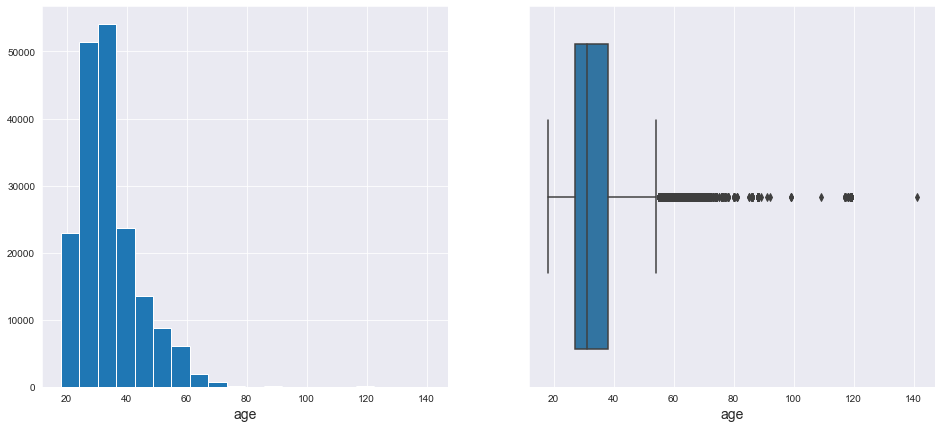

In [22]:
#to set the size of our figure
plt.figure(figsize = (16,7))
#to plot a sub plot at the first row and first column
plt.subplot(1, 2, 1)
df_ford['member_age'].hist(bins = 20);
#to set our x label
plt.xlabel("age", fontsize = 14);

#to plot a sub plot at the first row and second column
plt.subplot(1, 2, 2)
sb.boxplot(data = df_ford, x = 'member_age');
#to set our x label
plt.xlabel("age", fontsize = 14);

In [23]:
#to show some information about members' age
df_ford['member_age'].describe()

count    183412.000000
mean         34.049653
std           9.908290
min          18.000000
25%          27.000000
50%          31.000000
75%          38.000000
max         141.000000
Name: member_age, dtype: float64

In [24]:
#to show percentage of people younger than 65 years old
len(df_ford.query('member_age < 65')) / len(df_ford)

0.9908402939829455

>__as we can see the maximum member age was 143 years old which is imposible or hard to believe__

>__we found also that (99.1 %) or riders are less than 65 years old so we can treat older people as outliers and we can drop them.__ 

In [25]:
#to keep only data for people less than 65 years old
df_ford = df_ford.query('member_age < 65')

In [26]:
#to get our base color/
base_color = sb.color_palette()[0]

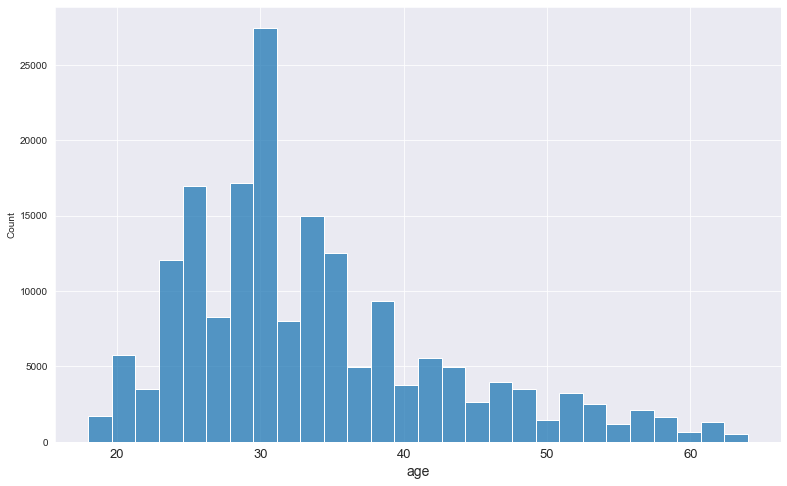

In [27]:
#to set the size of our figure
plt.figure(figsize = (13,8))
sb.histplot(data = df_ford, x= "member_age", bins = 28, color = base_color)
plt.xlabel("age", fontsize = 14);
#to set size for x ticks
plt.xticks(fontsize = 13);

>__most of the rider ages are between 20 and 40 years__

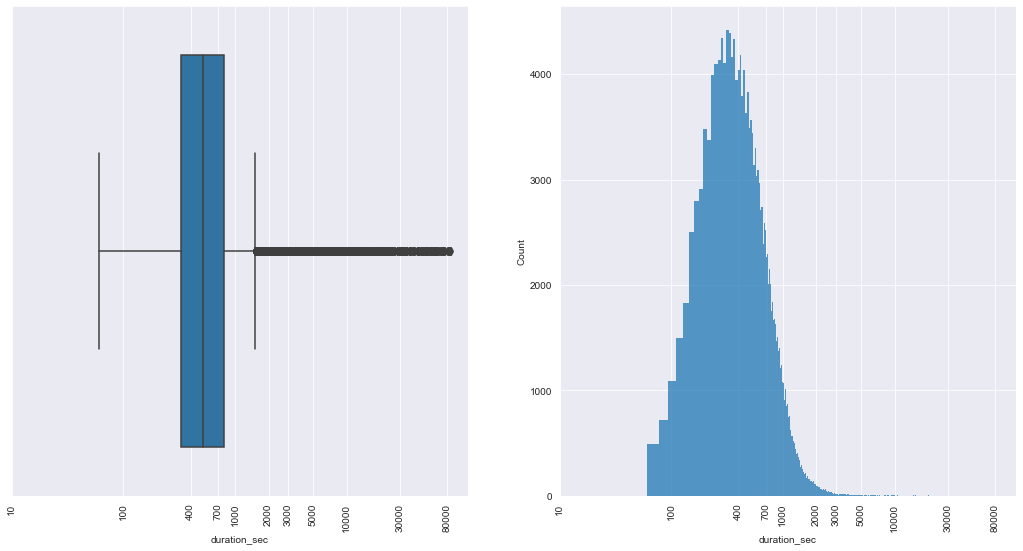

In [28]:
plt.figure(figsize = (18,9))
plt.subplot(1, 2, 1)
sb.boxplot(data = df_ford, x = 'duration_sec')
plt.xscale("log")
ticks = [10, 100, 400, 700, 1000, 2000, 3000, 5000, 10000, 30000, 80000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation = 90);

plt.subplot(1, 2, 2)
sb.histplot(data = df_ford, x = 'duration_sec')
plt.xscale("log")
plt.xticks(ticks, labels, rotation = 90);

In [29]:
len(df_ford.query('duration_sec < 2800 ')) / len(df_ford)

0.9859133229150617

>__as we can see that about (98.6 %) of the duration in seconds is less than 2000 seconds so we can drop data with higher duration in seconds as they are out liers and would affect ou results)__

In [30]:
#to keep data for durations less than 2800 seconds
df_ford = df_ford.query('duration_sec < 2800 ')

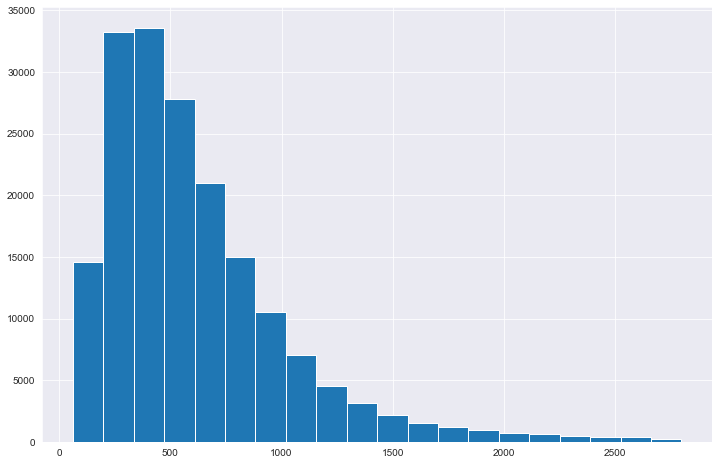

In [31]:
plt.figure(figsize = (12,8))
df_ford['duration_sec'].hist(bins = 20);

In [32]:
df_ford['duration_sec'].describe()

count    179172.000000
mean        611.212840
std         413.501447
min          61.000000
25%         323.000000
50%         508.000000
75%         779.000000
max        2799.000000
Name: duration_sec, dtype: float64

>__most trips' duration was  about 200 to 700 seconds (3 mins to 12 mins)__

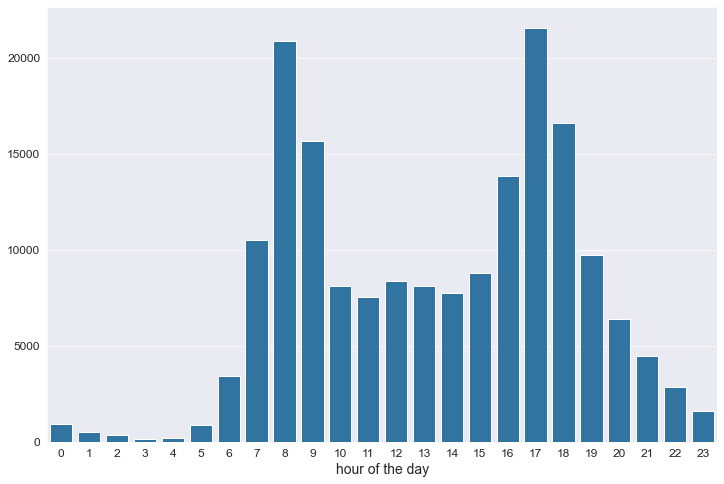

In [33]:
plt.figure(figsize = (12,8))
sb.countplot(data = df_ford, x = 'start_hour' ,color = base_color, alpha = 1);
plt.tick_params(axis='both', which='major', labelsize=12);
plt.xlabel("hour of the day", fontsize = 14);
plt.ylabel("");

>__most trips are taken at 8 AM and 5 PM__

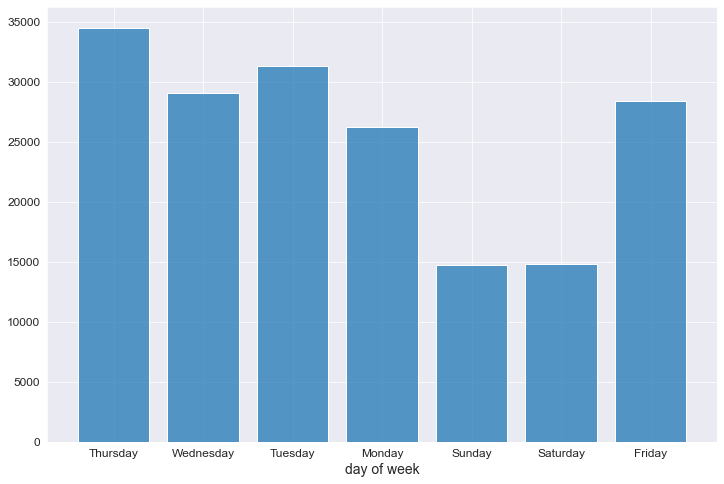

In [34]:
plt.figure(figsize = (12,8))
sb.histplot(df_ford['start_day'], shrink = 0.8 )
plt.tick_params(axis='both', which='major', labelsize=12);
plt.xlabel("day of week", fontsize = 14);
plt.ylabel("");

>__least trips were taken on sundays and saturdays ( week ends )__

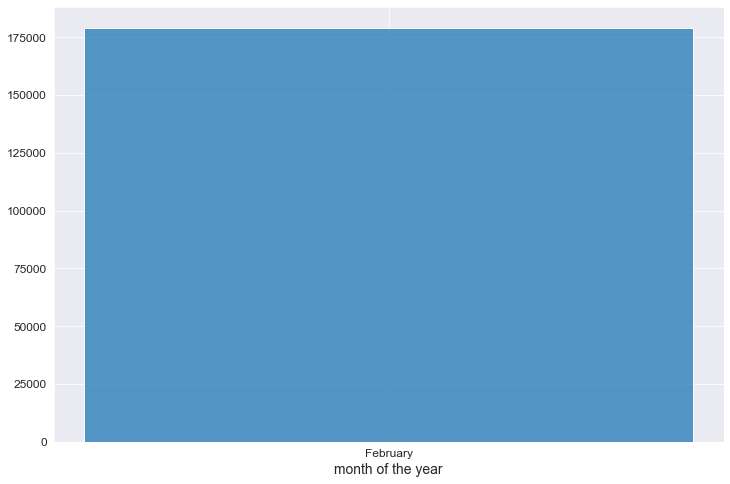

In [35]:
plt.figure(figsize = (12,8))
sb.histplot(df_ford['start_month'], shrink = 2 );
plt.tick_params(axis='both', which='major', labelsize=12);
plt.xlabel("month of the year", fontsize = 14);
plt.ylabel("");

>__the data we are investigating was collected in february month only__

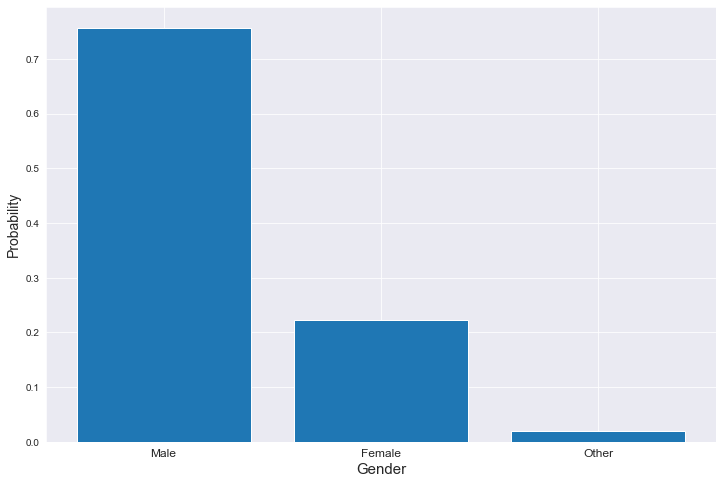

In [36]:
plt.figure(figsize = (12,8))
sb.histplot(data = df_ford, x= 'member_gender', shrink = 0.8, color = base_color, alpha = 1,stat='probability',);
plt.xticks(fontsize = 12);
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("Probability",fontsize = 14);

In [37]:
df_ford['member_gender'].value_counts()[0] / len(df_ford)  , df_ford['member_gender'].value_counts()[1] / len(df_ford),df_ford['member_gender'].value_counts()[2] / len(df_ford)

(0.7573783850155158, 0.22315428750027907, 0.01946732748420512)

>__about ( 76 % ) of the riders are Males and ( 22 % ) are females and other gender was about ( 2 % )__

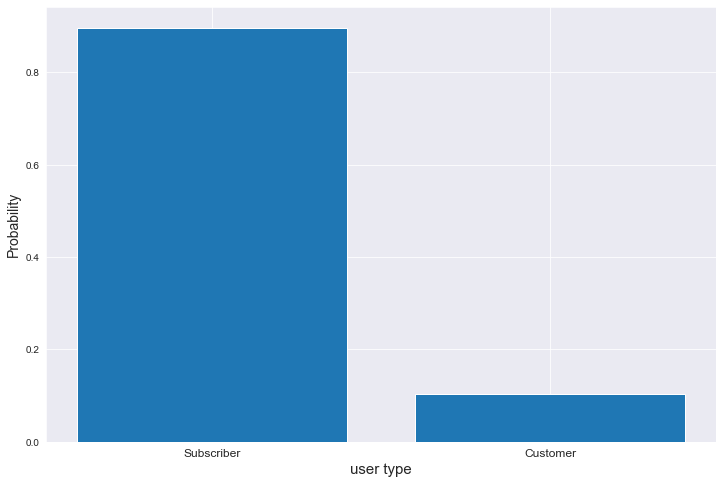

In [38]:
plt.figure(figsize = (12,8));
sb.histplot(data = df_ford, x= 'user_type', shrink = 0.8, color = base_color, alpha = 1,stat='probability');
plt.xticks(fontsize = 12);
plt.xlabel("user type", fontsize = 15);
plt.ylabel("Probability",fontsize = 14);

In [39]:
df_ford['user_type'].value_counts()[0] / len(df_ford)

0.897098877056683

>__about ( 90 %) of the riders are subscribers__

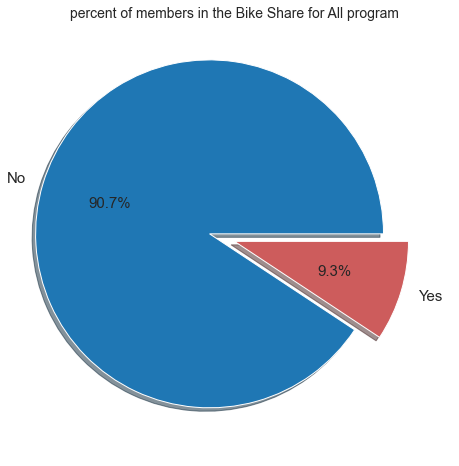

In [40]:
plt.figure(figsize = (12,8))
df_ford['bike_share_for_all_trip'].value_counts().plot(kind = "pie", shadow = True, explode = [0.15 , 0],
                                        figsize = (8,8), autopct='%.1f%%',colors = [base_color,'indianred'],
                                            fontsize = 15);
plt.ylabel("");
plt.title("percent of members in the Bike Share for All program", fontsize = 14);

>__about ( 90,7 %) of the riders are members in the Bike Share for All program.__

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
><br>>__(99.1 %) or riders are less than 65 years old and most of them was between 20 and 40 years old.__ 
><br>
><br>>__most trips' durations was  about 200 to 700 seconds (3 mins to 12 mins)__
><br>>__most trips are taken at 7 AM and 6 PM, with peaks at 8 AM and 5 PM__
><br>
><br>>__least trips were taken on sundays and saturdays ( week ends ), with peak on Thursdays and Tuesdays__
><br>
><br>>__the data we are investigating was collected in february month only__
><br>
><br>>__about ( 90 %) of the riders are subscribers__
><br>
><br>>__about ( 76 % ) of the riders are Males and ( 22 % ) are females and other gender was about ( 2 % )__
><br>
><br>>__about ( 90,7 %) of the riders are members in the Bike Share for All program.__
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
><br>> __yes, in the member age distribution i found that there was some people wo are older than 100 years old, actually there was some who are 143 years old which was imposible or hard to belive and they were also affecting our results and destributions.__
><br>__i included people who were 65 years old or lower only  and they were representing about 99.1 % of the age distribution.__

>__also the distribution of durations showd that some people spent more than 80000 seconds on trips (22 hours and 30 mins) it is also hard to belive that number i tried to plot my data with logarithmic scale but the outliers was influencing the distribution.__
><br>__so i kep values with 2800 seconds or less which was representing about (98.6 % ) of the data.__

## Bivariate Exploration


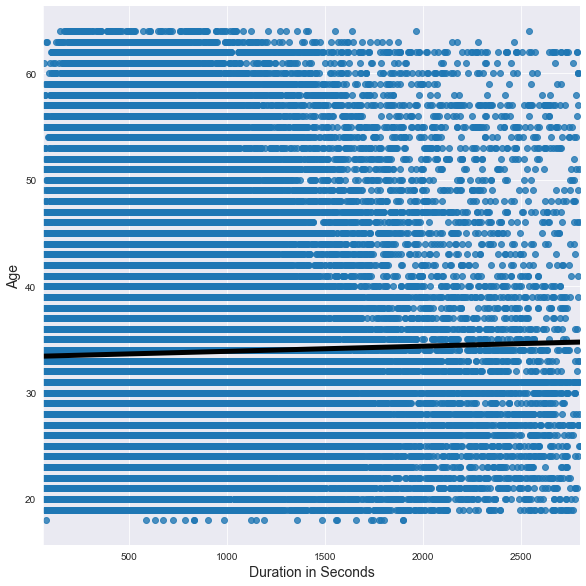

In [41]:
sb.lmplot(data = df_ford, x = 'duration_sec', y= 'member_age', height = 8, line_kws={'color': 'black', "lw":5});
plt.ylabel("Age", fontsize = 14);
plt.xlabel("Duration in Seconds", fontsize = 14);

>__there is a weak positive realtion ship between member age and duration of the trip__ 

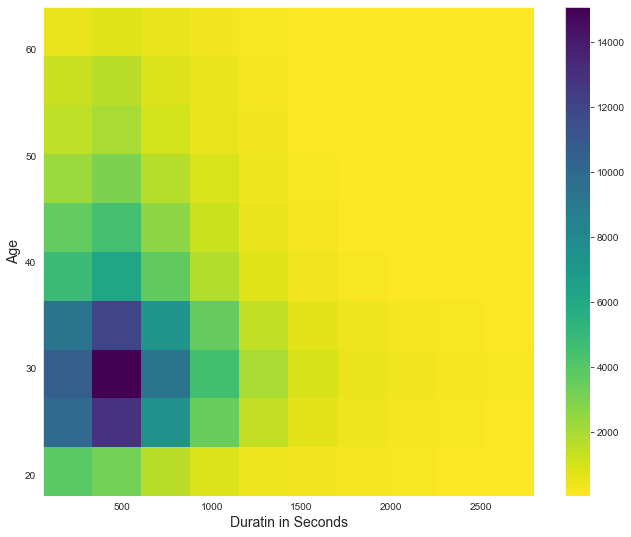

In [42]:
plt.figure(figsize = (11,9))
plt.hist2d(data = df_ford, x = 'duration_sec', y = 'member_age', cmin=0.5, cmap='viridis_r');
plt.colorbar();
plt.ylabel("Age", fontsize = 14);
plt.xlabel("Duratin in Seconds", fontsize = 14);

>__people who are 30 years old spent more time in the tribs.__

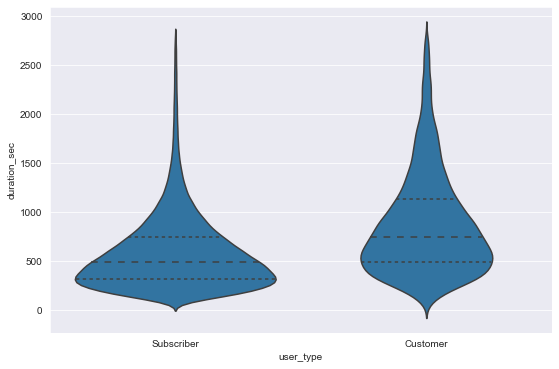

In [43]:
plt.figure(figsize = (9,6))
base_color = sb.color_palette()[0]
sb.violinplot(data=df_ford, x='user_type', y='duration_sec', color = base_color, inner='quartile');

>__customers spend more time in their tribs on average.__
><br>__most subsrcribers trips are nearly of the same duration, but subscribers spend different amount of time in their trips.__

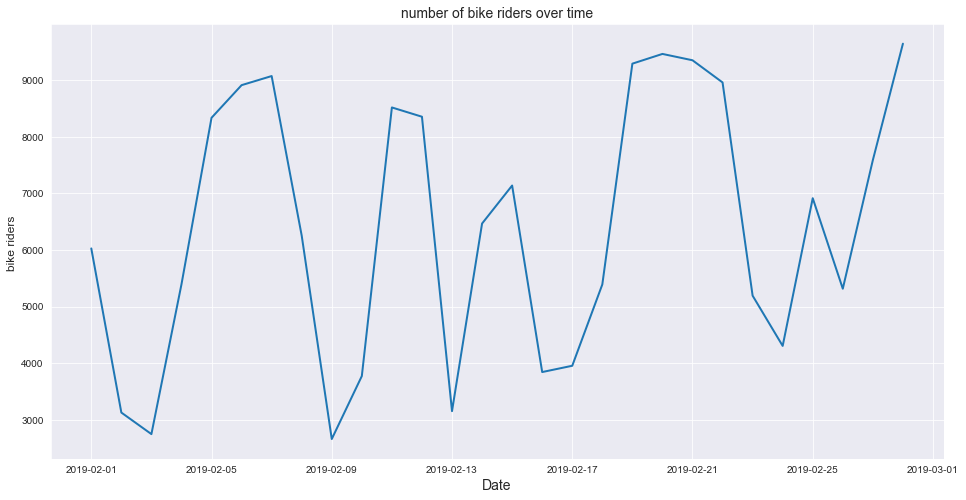

In [44]:
plt.figure(figsize = (16,8))
df_ford.groupby(df_ford['start_time'].dt.date)['bike_id'].size().plot(kind = 'line', linewidth = 2);
plt.xlabel("Date", fontsize = 14);
plt.ylabel("bike riders ", fontsize = 12);
plt.title('number of bike riders over time', fontsize = 14);

>__there was a huge difference in number of bike riders eachday with peaks on weekends__

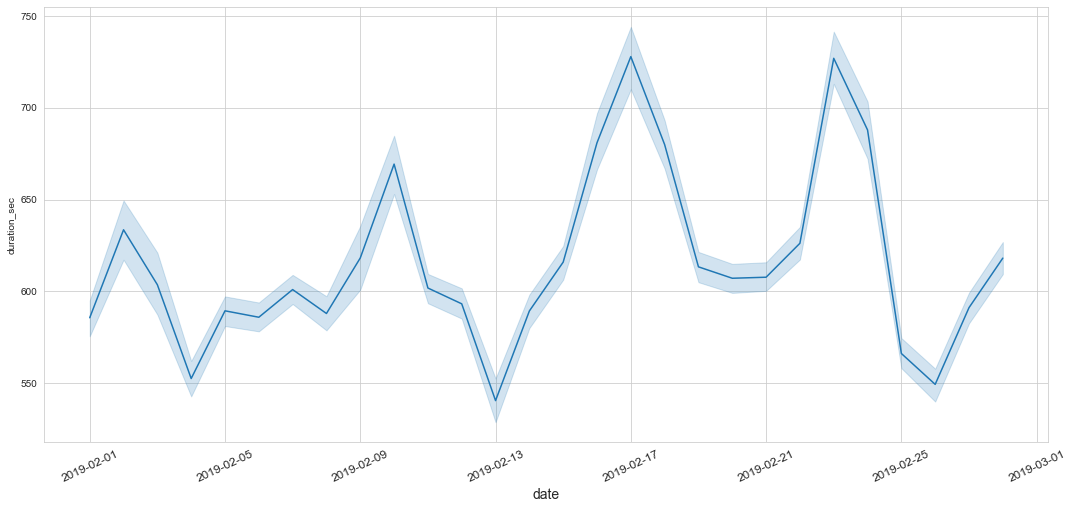

In [45]:
sb.set_style("whitegrid")
plt.figure(figsize = (18,8))
sb.lineplot(data = df_ford, x =df_ford['start_time'].dt.date, y = 'duration_sec') ;
plt.xticks(rotation = 25 , fontsize = 12 );
plt.xlabel("date", fontsize = 14);

>__there was a huge difference in trips duration eachday with lower values in weekends__
><br>__the days with highest usage of bikes was in 17-2-2019 and 23-2-2019__

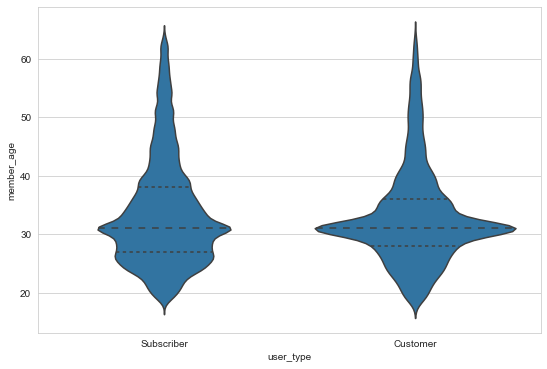

In [46]:
plt.figure(figsize = (9,6))
base_color = sb.color_palette()[0]
sb.violinplot(data=df_ford, x='user_type', y='member_age', color = base_color, inner='quartile');

>__most of the subscribers and customers are 30 years old, lower percentage of members are above 40 years old.__

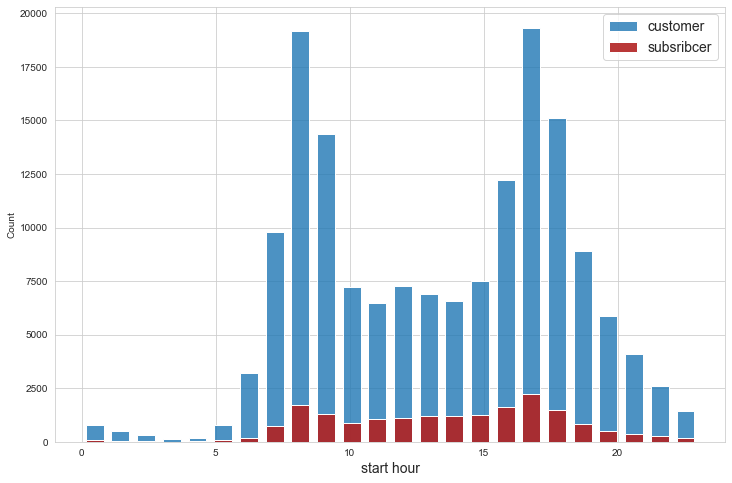

In [47]:
df1 = df_ford.query('user_type == "Subscriber"')
df2 = df_ford.query('user_type == "Customer"')
plt.figure(figsize = (12,8))
sb.histplot(df1['start_hour'], alpha=0.8, label='x', color = base_color, shrink = 0.7, bins = 24);
sb.histplot(df2['start_hour'], alpha=0.9, label='y', color = ['firebrick'], shrink = 0.7, bins = 24);
plt.legend(["customer","subsribcer"], prop={'size': 14});
plt.xlabel('start hour', fontsize = 14);

>__most trips are taken at 7 AM and 6 PM, with peaks at 8 AM and 5 PM__

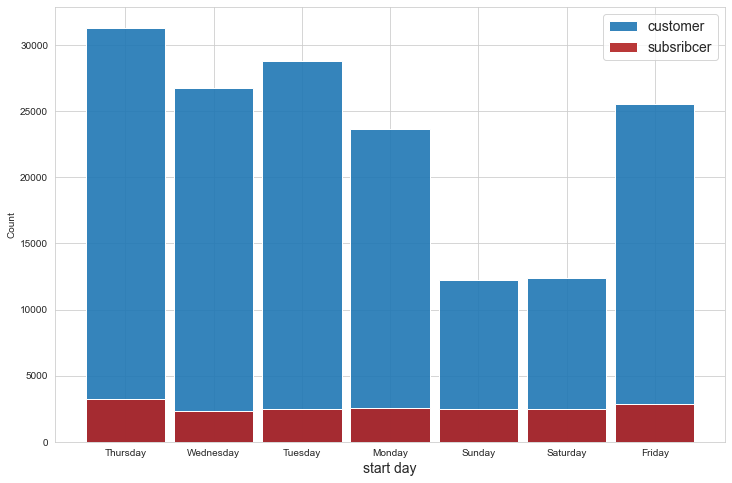

In [48]:
plt.figure(figsize = (12,8))
sb.histplot(df1['start_day'], alpha=0.9, label='x', color = base_color, shrink = 0.9);
sb.histplot(df2['start_day'], alpha=0.9, label='y', color = ['firebrick'], shrink = 0.9);
plt.legend(["customer","subsribcer"], prop={'size': 14});
plt.xlabel('start day', fontsize = 14);

>__number of subscriber bike riders almost the same for all days.__

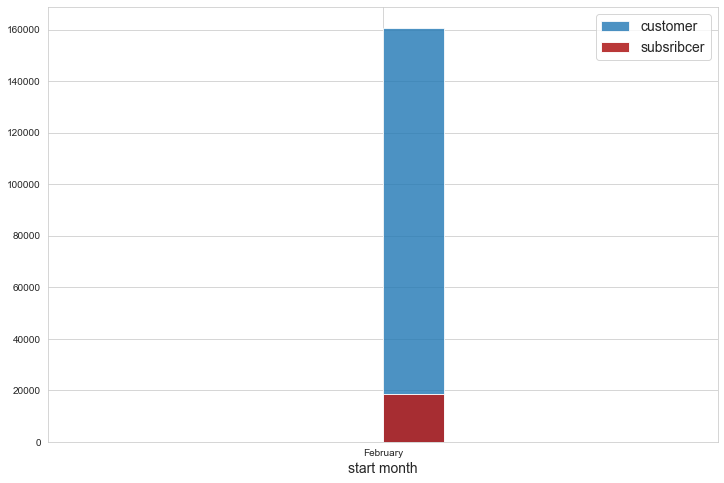

In [49]:
plt.figure(figsize = (12,8))
plt.hist(df1['start_month'], alpha=0.8, label='x', color = base_color);
plt.hist(df2['start_month'], alpha=0.9, label='y', color = ['firebrick']);
plt.legend(["customer","subsribcer"], prop={'size': 14});
plt.xlabel('start month', fontsize = 14);

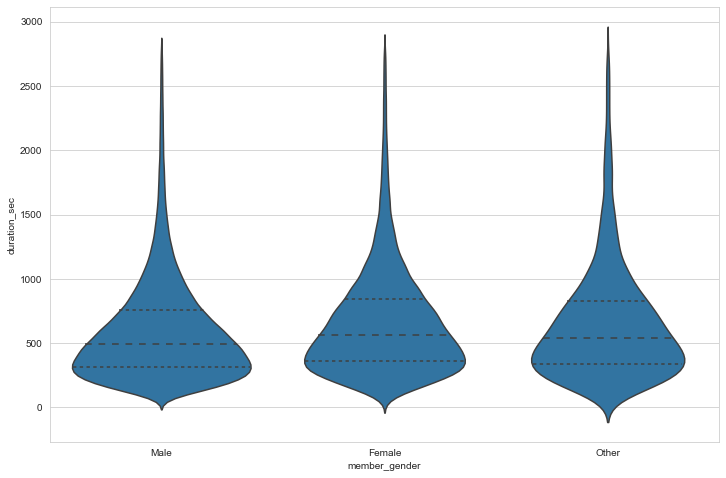

In [50]:
plt.figure(figsize = (12,8))
sb.violinplot(data = df_ford, x = "member_gender", y = 'duration_sec', alpha = 1, color = base_color, inner = "quartile");

>__duration doesn't depend strongly on member's gender__

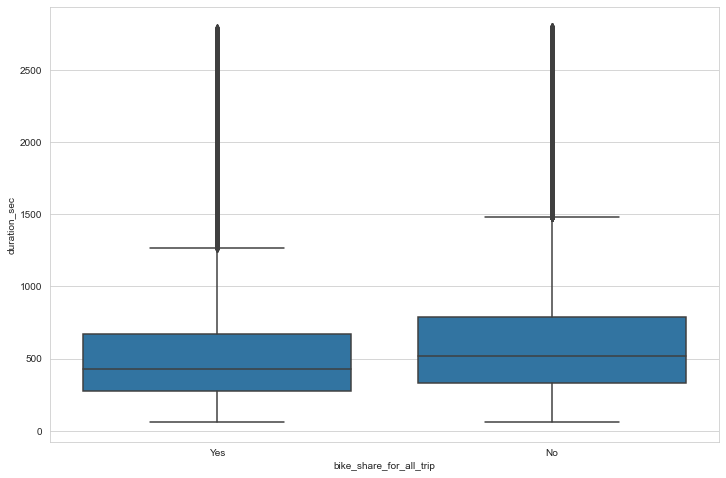

In [51]:
plt.figure(figsize = (12,8))
sb.boxplot(data = df_ford, x = "bike_share_for_all_trip", y = 'duration_sec', color = base_color);

>__people who are not members in the bike share for all program spend slightly more tims in tribs than members.__

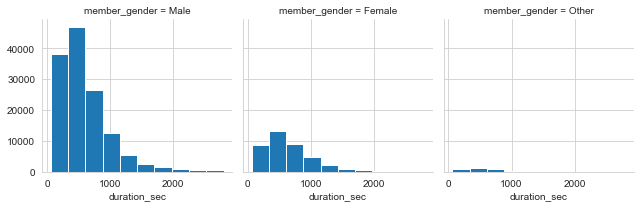

In [52]:
pl = sb.FacetGrid(data = df_ford, col = 'member_gender');
pl.map(plt.hist, "duration_sec");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
><br>>__people who are 30 years old spent more time in the trips.__
><br>>__there is a weak positive realtion ship between member age and duration of the trib__ 
><br>>__most of the subscribers and customers are 30 years old, lower percentage of members are above 40 years old.__
><br>>__most trips are taken at 7 AM and 6 PM, with peaks at 8 AM and 5 PM__
><br>>__duration doesn't depend strongly on member's gender__
><br>>__people who are not members in the bike share for all program spend slightly more tims in trips than members.__
><br>>__customers spend more time in their trips on average.__
><br>>__most subsrcribers trips are nearly of the same duration, but subscribers spend different amount of time in their tribs.__
><br>>__there was a huge difference in trips duration eachday with lower values in weekends__
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


><br>>__there was a huge difference in number of bike riders each day with peaks on weekends__
><br>>__number of subscriber bike riders almost the same for all days.__

## Multivariate Exploration


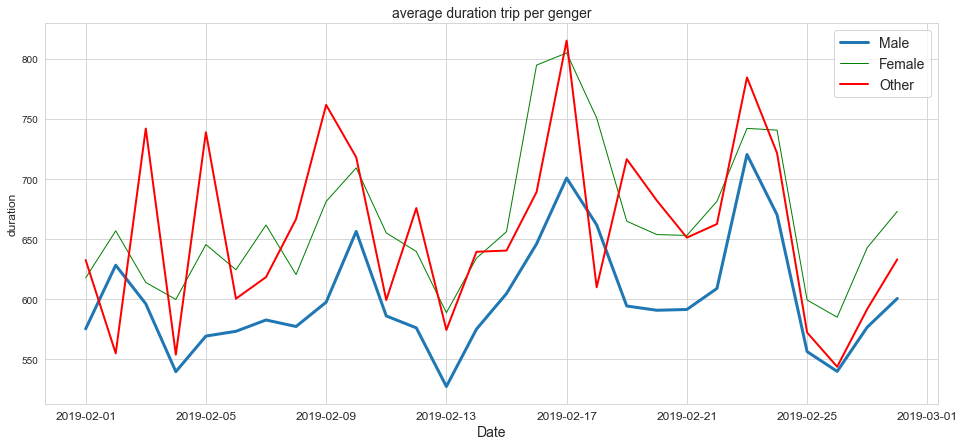

In [53]:
df1 = df_ford.query("member_gender =='Male'")
df2 = df_ford.query("member_gender =='Female'")
df3 = df_ford.query("member_gender =='Other'")

plt.figure(figsize = (16,7))
sb.lineplot(data =df1.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = base_color, linewidth = 3);
sb.lineplot(data =df2.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = 'g',linewidth = 1);
sb.lineplot(data =df3.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = 'r',linewidth = 2);
plt.legend(['Male','Female','Other'], fontsize = 14);
plt.xticks(fontsize = 12);
plt.xlabel("Date", fontsize = 14);
plt.ylabel("duration", fontsize = 12);
plt.title('average duration trip per genger', fontsize = 14);

>__although people whose gender is "other" represents the lowst percentage of bike riders in our data, they spend much more time in their trips if compared to "Female" or "Male" , we can also see that females spend more time in trips than males on average.__

C:\Users\omar9980\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


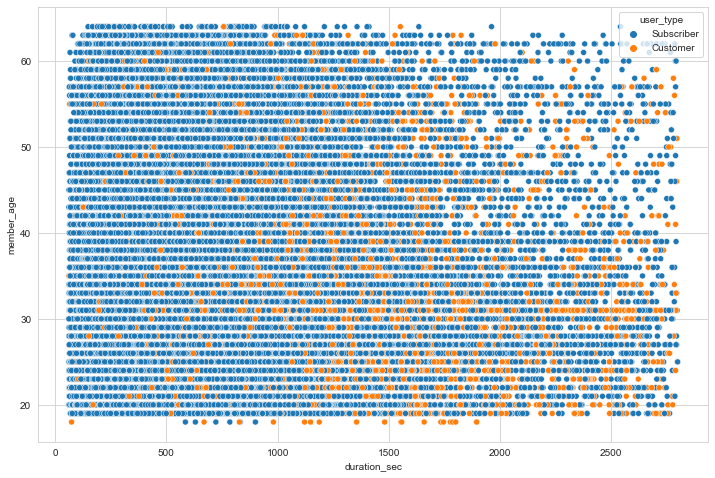

In [54]:
plt.figure(figsize = (12,8))
sb.scatterplot(data=df_ford.loc[df_ford['member_gender'].isin(['Male', 'Female', 'Other'])], x="duration_sec", y="member_age", hue="user_type");

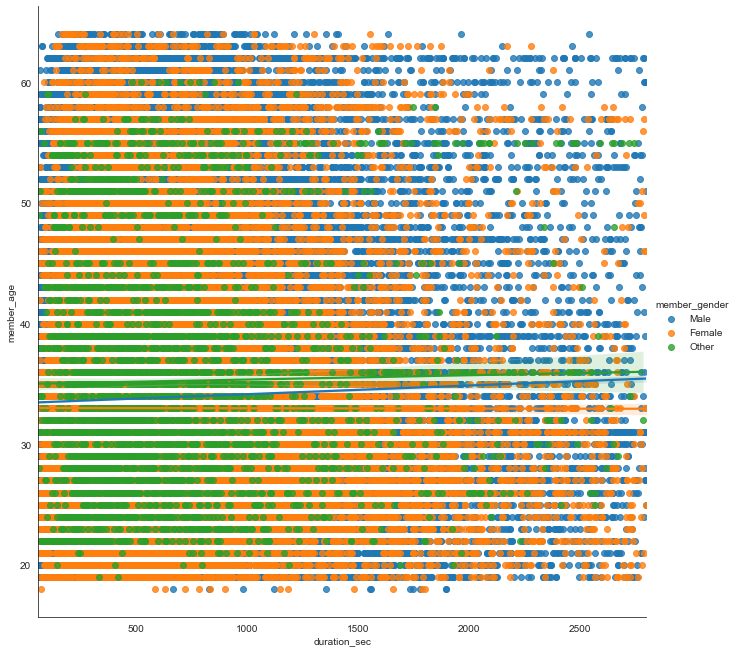

In [55]:
sb.set_style("white")
sb.lmplot(x='duration_sec', y='member_age', hue='member_gender', data=df_ford, fit_reg=True, height = 9);

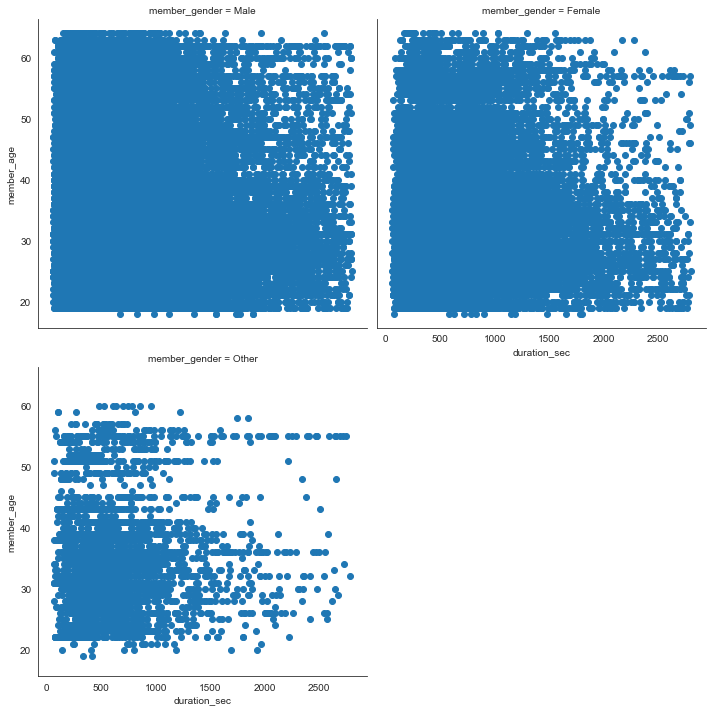

In [57]:
x = sb.FacetGrid(data = df_ford, col = 'member_gender', col_wrap = 2, height = 5);
x.map(plt.scatter ,'duration_sec', "member_age");

>__for all genders there is a weak positive relation between age and trip duration, people whose gender is "other" are more distributed with age about 30 years__

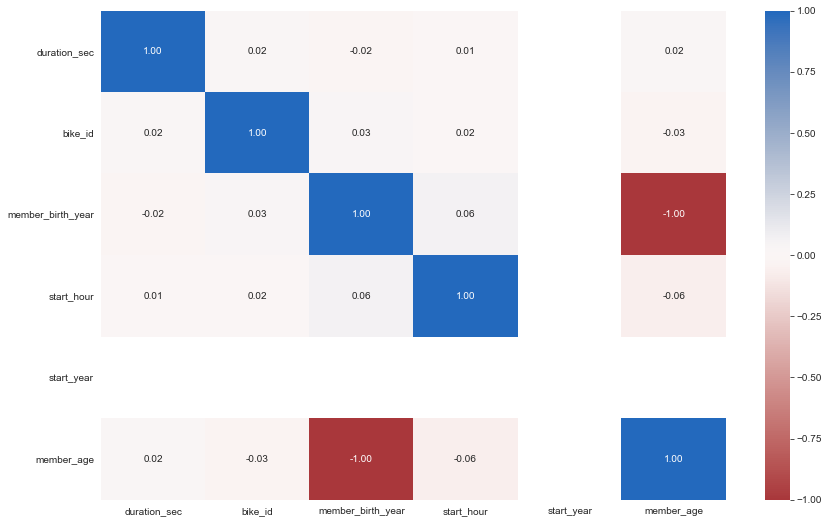

In [58]:
plt.figure(figsize = (14,9))
sb.heatmap(df_ford.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

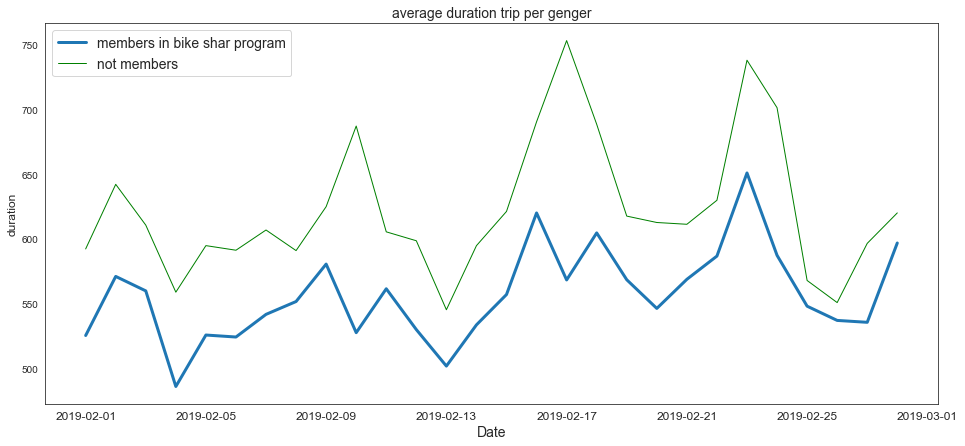

In [59]:
df6 = df_ford.query("bike_share_for_all_trip =='Yes'")
df7 = df_ford.query("bike_share_for_all_trip =='No'")

plt.figure(figsize = (16,7))
sb.lineplot(data =df6.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = base_color, linewidth = 3);
sb.lineplot(data =df7.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = 'g',linewidth = 1);
plt.legend(['members in bike shar program','not members'], fontsize = 14);
plt.xticks(fontsize = 12);
plt.xlabel("Date", fontsize = 14);
plt.ylabel("duration", fontsize = 12);
plt.title('average duration trip per genger', fontsize = 14);

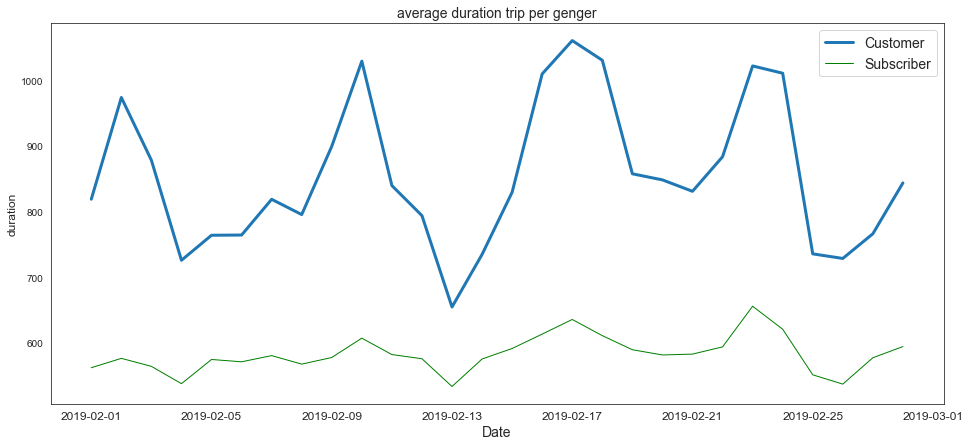

In [60]:
df4 = df_ford.query("user_type =='Customer'")
df5 = df_ford.query("user_type =='Subscriber'")

plt.figure(figsize = (16,7))
sb.lineplot(data =df4.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = base_color, linewidth = 3);
sb.lineplot(data =df5.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = 'g',linewidth = 1);
plt.legend(['Customer','Subscriber'], fontsize = 14);
plt.xticks(fontsize = 12);
plt.xlabel("Date", fontsize = 14);
plt.ylabel("duration", fontsize = 12);
plt.title('average duration trip per genger', fontsize = 14);

>__we can clearly see in each day in our data set that customers spend much more time on their trips compared to subscribers.__ 

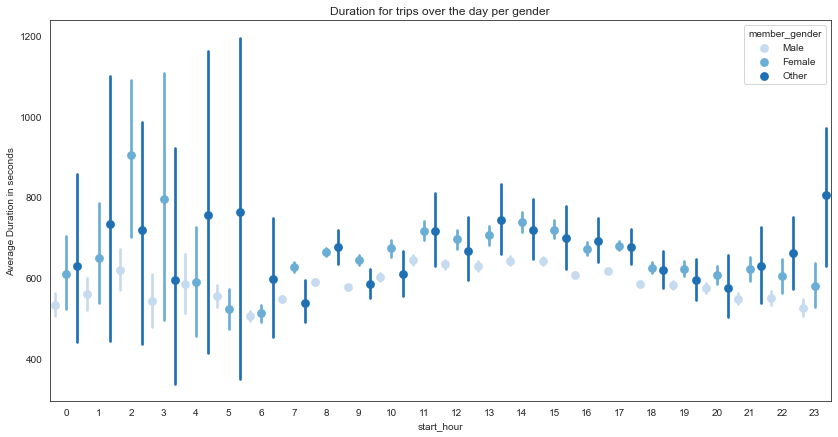

In [61]:
plt.figure(figsize = (14,7))
sb.pointplot(data = df_ford, x = 'start_hour', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.7)
plt.title('Duration for trips over the day per gender')
plt.ylabel('Average Duration in seconds')
plt.show();

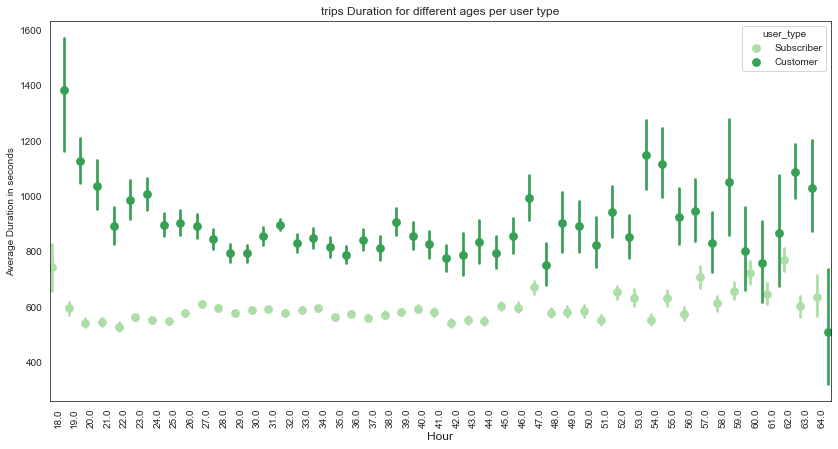

In [62]:
plt.figure(figsize = (14,7))
sb.pointplot(data = df_ford, x = 'member_age', y = 'duration_sec', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.7)
plt.title('trips Duration for different ages per user type')
plt.ylabel('Average Duration in seconds')
plt.xlabel("Hour", fontsize = 12)
plt.xticks(rotation= 90)
plt.show();

>__average trips duration for customers is higher than average trip duration for subscribers.__
><br>__people who are 18 years old spend much time in trips, people of different ages spend nearly the same time per user type.__

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
><br>>__for all genders there is a weak positive relation between age and trip duration, people whose gender is "other" are more distributed with age about 30 years__
><br>>__people who aren't members in (bike_share_program_for_all) are spending much time on their trips in average cmpared to people who are members in the program.__
><br>>__average trips duration for customers is higher than average trip duration for subscribers.__
><br>>__people who are 18 years old spend much time in trips, people of different ages spend nearly the same time per user type.__
><br>>__in each day in our data set that customers spend much more time on their trips compared to subscribers.__  
### Were there any interesting or surprising interactions between features?
><br>>__although people whose gender is "other" represents the lowst percentage of bike riders in our data, they spend much more time in their trips if compared to "Female" or "Male" , we can also see that females spend more time in trips than males on average.__